In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import numpy as np

In [3]:
alexnet = models.alexnet(pretrained=True)

# extract the first layer from alexnet
first_layer = alexnet.features[0]

# first_layer.weight are torch nn parameters
print(type(first_layer.weight))
print(first_layer.weight.requires_grad)

# first_layer.weight.data are torch tensors
print(type(first_layer.weight.data))
print(first_layer.weight.data.requires_grad)

<class 'torch.nn.parameter.Parameter'>
True
<class 'torch.Tensor'>
False


# Plot the first layer of Alexnet

torch.Size([64, 3, 11, 11])


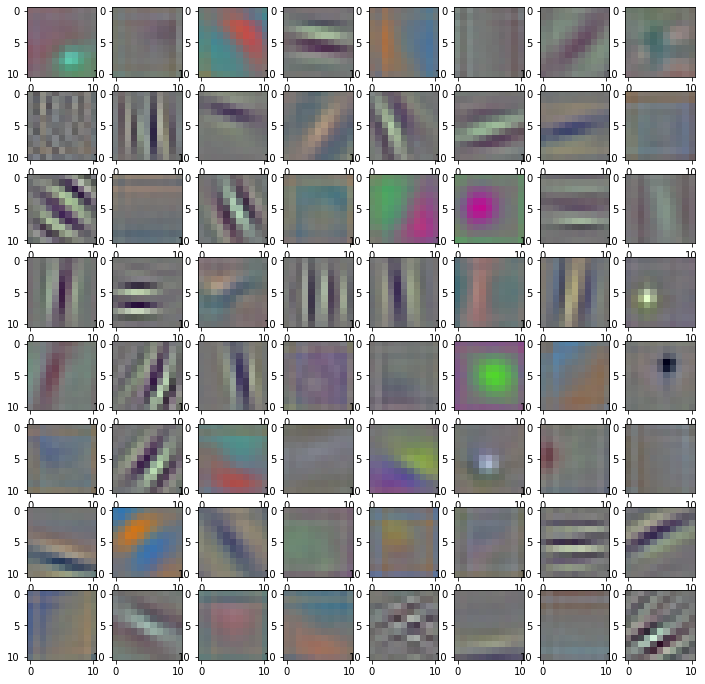

In [4]:
data = first_layer.weight.data

print(data.shape)

min_w, max_w = data.min(), data.max()

data -= min_w
data /= (max_w-min_w)

fig, axs = plt.subplots(8, 8, figsize=(12, 12))

axs = axs.flatten()

for i, (ax, image) in enumerate(zip(axs, data)):
    ax.imshow(image.permute(1, 2, 0))

In [10]:
transform = transforms.Compose([transforms.ToTensor()])

train_ds = datasets.ImageFolder("data/hymenoptera_data/train", transform=transform)
test_ds = datasets.ImageFolder("data/hymenoptera_data/val", transform=transform)


train_ds[0][0].shape, train_ds[0][1]

(torch.Size([3, 512, 768]), 0)